# Deep Q-Network

In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

In [14]:
!pip install torch

In [28]:
#!pip install Box2D gym --user
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[all]
!pip3 install gym[Box_2D]

  Using cached box2d-py-2.3.8.tar.gz (374 kB)
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp39-cp39-linux_x86_64.whl size=496351 sha256=1c3c62a202283ab5d6b024fa6eab1a8dfed206761181aaad5c82859882c92001
  Stored in directory: /home/med/.cache/pip/wheels/a0/6a/54/2383a12859109612796c6b235ff6704a82b99caa4308ca0b43
Successfully built box2d-py
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Using cached ale_py-0.7.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached mujoco-py-1.50.1.68.tar.gz (120 kB)
  Using cached lz4-3.1.10-cp39-cp39-manylinux2010_x86_64.whl (1.8 MB)
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp39-cp39-linux_x86_64.whl size=496350 sha256=b8b7ccae43aefecaaa62c4d7ed53e79f59598ab780deb0c08790236c778c875d
  Stored in directory: /home/med/.cache/pip/wheels/a4/c2/c1/076651c394f05fe60990cd85616c2d95bc1619aa113f559d7d
  ERROR: Command errored out with exit status 1:
   command: /home/med/anaconda3/bin/python -u -c 'import io, os,

## 1. Import Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# import the rest of the packages that you will need

## 2. Examine the State and Action Spaces

Initialize the environment

In [33]:
!conda install  --y swig  # needed to build Box2D in the pip install
!pip install --y box2d-py # a repackaged version of pybox2d
#

Solving environment: done

# All requested packages already installed.


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --y


In [35]:
#!pip install stable_baselines gym box2d-py --user

     |████████████████████████████████| 240 kB 355 kB/s eta 0:00:01
  Using cached ale_py-0.7.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
env = gym.make('CartPole-v0')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (4,)
Number of actions:  2


## 3. Watch an untrained agent

In [29]:
from dqn_agent import Agent
#del agent
agent = Agent(state_size=4, action_size=2, seed=0)

In [15]:


# watch an untrained agent
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:10.0
Episode:2 Score:14.0
Episode:3 Score:17.0
Episode:4 Score:31.0
Episode:5 Score:16.0
Episode:6 Score:15.0
Episode:7 Score:13.0
Episode:8 Score:19.0
Episode:9 Score:41.0
Episode:10 Score:27.0


## 4. Train the Agent with DQN

Train the agent using DQN.

In [30]:
env.reset()

array([-0.03785738, -0.00679921, -0.02786571,  0.04417225], dtype=float32)

In [31]:
def dqn(n_episodes=2000, max_t=200, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        done=False
        while not done   :
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
       # if np.mean(scores_window)>=200.0:
        #    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint1.pth')
          #  break

    return scores

scores = dqn()

Episode 100	Average Score: 17.61
Episode 200	Average Score: 12.35
Episode 300	Average Score: 10.97
Episode 400	Average Score: 10.49
Episode 500	Average Score: 9.780
Episode 600	Average Score: 10.33
Episode 700	Average Score: 11.12
Episode 800	Average Score: 12.53
Episode 900	Average Score: 14.45
Episode 1000	Average Score: 136.39
Episode 1100	Average Score: 189.05
Episode 1200	Average Score: 190.64
Episode 1300	Average Score: 192.21
Episode 1400	Average Score: 190.14
Episode 1500	Average Score: 190.65
Episode 1600	Average Score: 187.94
Episode 1700	Average Score: 181.09
Episode 1800	Average Score: 180.10
Episode 1900	Average Score: 178.54
Episode 2000	Average Score: 181.40


## 5. Plot the results

Plot the obtained scores from the DQN agent.

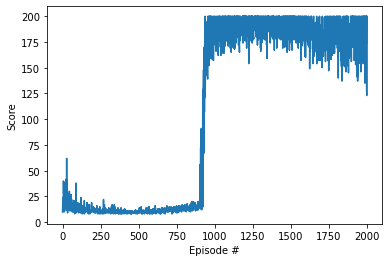

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 6. Watch your trained agent!

ep:  1 reard:  200.0
ep:  2 reard:  200.0
ep:  3 reard:  200.0
ep:  4 reard:  200.0
ep:  5 reard:  200.0
ep:  6 reard:  200.0
ep:  7 reard:  200.0
ep:  8 reard:  200.0
ep:  9 reard:  200.0
ep:  10 reard:  200.0
ep:  11 reard:  200.0
ep:  12 reard:  200.0
ep:  13 reard:  200.0
ep:  14 reard:  200.0
ep:  15 reard:  200.0
ep:  16 reard:  200.0
ep:  17 reard:  200.0
ep:  18 reard:  200.0
ep:  19 reard:  200.0
ep:  20 reard:  200.0
ep:  21 reard:  200.0
ep:  22 reard:  200.0
ep:  23 reard:  200.0
ep:  24 reard:  200.0
ep:  25 reard:  200.0
ep:  26 reard:  200.0
ep:  27 reard:  200.0
ep:  28 reard:  200.0
ep:  29 reard:  200.0
ep:  30 reard:  200.0
ep:  31 reard:  200.0
ep:  32 reard:  200.0
ep:  33 reard:  200.0
ep:  34 reard:  200.0
ep:  35 reard:  200.0
ep:  36 reard:  200.0
ep:  37 reard:  200.0
ep:  38 reard:  200.0
ep:  39 reard:  200.0
ep:  40 reard:  200.0
ep:  41 reard:  200.0
ep:  42 reard:  200.0
ep:  43 reard:  200.0
ep:  44 reard:  200.0
ep:  45 reard:  200.0
ep:  46 reard:  200

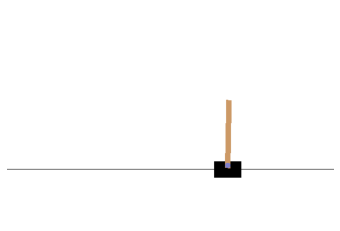

In [33]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint1.pth'))
score=0
for i in range(100):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(500):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        state, reward, done, _ = env.step(action)
        score+=reward
        if done:
            break
    print('ep: ',i+1,"reard: ",score)
    score=0
            
            
env.close()

In [4]:
from dqn_agent import Duel_Agent

duel_agent = Duel_Agent(state_size=4, action_size=2, seed=0)

In [26]:
def duel_dqn(n_episodes=2000, max_t=200, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        done=False
        for i in range (max_t)  :
            action = duel_agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            duel_agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
       # if np.mean(scores_window)>=200.0:
        #    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
    torch.save(duel_agent.qnetwork_local.state_dict(), 'dual_dqn_checkpoint.pth')
          #  break
    return scores

duel_scores = duel_dqn()

Episode 100	Average Score: 37.05
Episode 200	Average Score: 125.70
Episode 300	Average Score: 189.79
Episode 400	Average Score: 197.74
Episode 500	Average Score: 197.59
Episode 600	Average Score: 197.13
Episode 700	Average Score: 196.93
Episode 800	Average Score: 198.89
Episode 900	Average Score: 198.43
Episode 1000	Average Score: 198.26
Episode 1100	Average Score: 191.54
Episode 1200	Average Score: 190.43
Episode 1300	Average Score: 194.79
Episode 1400	Average Score: 192.89
Episode 1500	Average Score: 195.42
Episode 1600	Average Score: 196.03
Episode 1700	Average Score: 196.49
Episode 1800	Average Score: 197.45
Episode 1900	Average Score: 197.49
Episode 2000	Average Score: 197.69


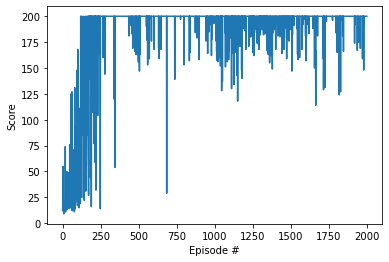

In [27]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(duel_scores)), duel_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

ep:  1 reard:  200.0
ep:  2 reard:  200.0
ep:  3 reard:  200.0
ep:  4 reard:  200.0
ep:  5 reard:  200.0
ep:  6 reard:  200.0
ep:  7 reard:  200.0
ep:  8 reard:  200.0
ep:  9 reard:  200.0
ep:  10 reard:  200.0
ep:  11 reard:  200.0
ep:  12 reard:  200.0
ep:  13 reard:  200.0
ep:  14 reard:  200.0
ep:  15 reard:  200.0
ep:  16 reard:  200.0
ep:  17 reard:  200.0
ep:  18 reard:  200.0
ep:  19 reard:  200.0
ep:  20 reard:  200.0
ep:  21 reard:  200.0
ep:  22 reard:  200.0
ep:  23 reard:  200.0
ep:  24 reard:  200.0
ep:  25 reard:  200.0
ep:  26 reard:  200.0
ep:  27 reard:  200.0
ep:  28 reard:  200.0
ep:  29 reard:  200.0
ep:  30 reard:  200.0
ep:  31 reard:  200.0
ep:  32 reard:  200.0
ep:  33 reard:  200.0
ep:  34 reard:  200.0
ep:  35 reard:  200.0
ep:  36 reard:  200.0
ep:  37 reard:  200.0
ep:  38 reard:  200.0
ep:  39 reard:  200.0
ep:  40 reard:  200.0
ep:  41 reard:  200.0
ep:  42 reard:  200.0
ep:  43 reard:  200.0
ep:  44 reard:  200.0
ep:  45 reard:  200.0
ep:  46 reard:  200

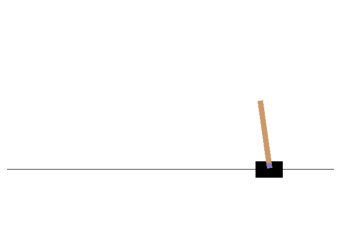

In [28]:
# load the weights from file
duel_agent.qnetwork_local.load_state_dict(torch.load('dual_dqn_checkpoint.pth'))
score=0
for i in range(100):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(500):
        action = duel_agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        state, reward, done, _ = env.step(action)
        score+=reward
        if done:
            break
    print('ep: ',i+1,"reard: ",score)
    score=0
            
            
env.close()